In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

In [4]:
# Read CSV
data = pd.read_csv("../assets/Sacramento_transactions.csv")

In [5]:
data.shape

(985, 12)

In [6]:
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [7]:
data.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


In [9]:
data.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [11]:
data.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [12]:
data['zip'] = data['zip'].astype(str)

In [13]:
data.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [14]:
# Filter properties with zero beds, baths, sqft as 'Plot'
data['beds'] = data['beds'].replace(0, 'Plot')
data['baths'] = data['baths'].replace(0, 'Plot')
data['sq__ft'] = data['sq__ft'].replace(0, 'Plot')

In [15]:
# Filter out zero beds, baths, sqft (now 'Plot' only)
data = data[(data['beds'] != 'Plot') & (data['baths'] != 'Plot') & (data['sq__ft'] != 'Plot')]

In [17]:
print("Shape of DataFrame after filtering out 'Plot' values:", data.shape)

Shape of DataFrame after filtering out 'Plot' values: (814, 12)


In [18]:
# Specify categorical and numeric columns
categorical_columns = ['zip', 'type', 'city']
numeric_columns = ['beds', 'baths', 'sq__ft']

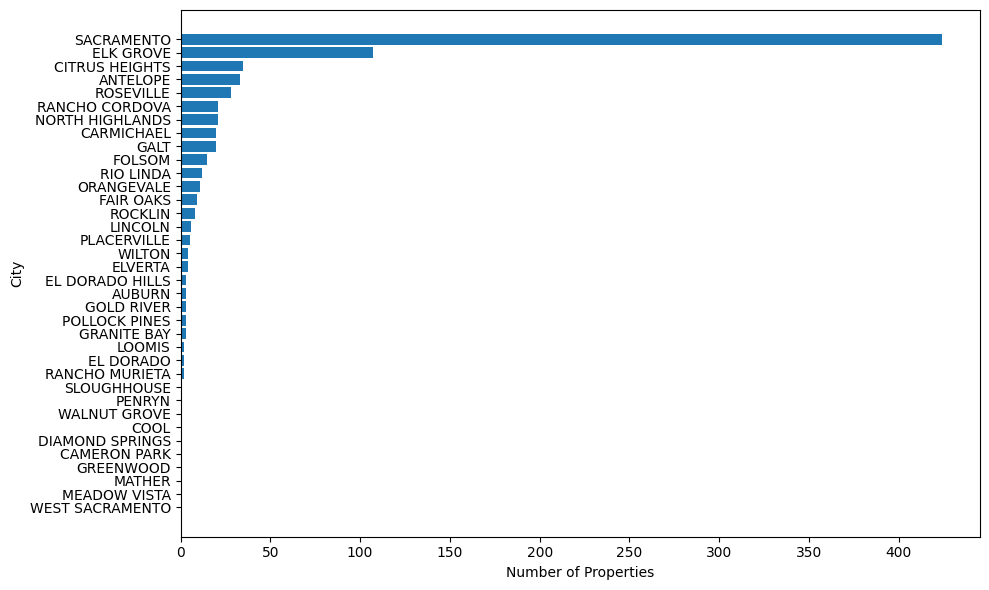

In [21]:
city_counts = data['city'].value_counts()

city_counts_sorted = city_counts.sort_values()

plt.figure(figsize=(10, 6))
plt.barh(city_counts_sorted.index, city_counts_sorted.values)
plt.xlabel('Number of Properties')
plt.ylabel('City')
plt.tight_layout()
plt.show()

In [25]:
# Step 1: Create an empty map
m = folium.Map(location=[37.76, -122.45], tiles="OpenStreetMap", zoom_start=10)

# Step 2: Loop through the DataFrame and add markers for each property
for i in range(0, len(data.head(1000))):
    folium.Marker(
        location=[data.iloc[i]['latitude'], data.iloc[i]['longitude']]
    ).add_to(m)

# Step 3: Display the map
display(m)

In [27]:
# Specify the preprocessing pipeline
# In these lines, we're setting up the preprocessing pipelines for both numeric and categorical data. 
# Numeric data is standardized using StandardScaler and categorical data is one-hot encoded using OneHotEncoder. 
# The ColumnTransformer is then used to apply these transformations to the respective columns.
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

In [28]:
# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('mlp', MLPRegressor(max_iter=500, random_state=42))
])

In [29]:
# Specify a grid for hyperparameter tuning
param_grid = {
    'mlp__hidden_layer_sizes': [(30,30,30), (50,50,50), (50,100,50)],
    'mlp__activation': ['tanh', 'relu'],
    'mlp__solver': ['sgd', 'adam'],
}

In [30]:
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)

In [31]:
# Separate features and target
X = data[categorical_columns + numeric_columns]
y = data['price']

In [32]:
# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
grid_search.fit(X_train, y_train)

# Display the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Make predictions
y_pred = grid_search.predict(X_test)

C:\Users\iwu48\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\iwu48\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\iwu48\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\iwu48\AppData

C:\Users\iwu48\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\iwu48\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\iwu48\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\iwu48\AppData

C:\Users\iwu48\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\iwu48\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_base.py:173: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\Users\iwu48\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\extmath.py:193: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\iwu48\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\extmath.py:193: RuntimeWarnin

Best parameters: {'mlp__activation': 'relu', 'mlp__hidden_layer_sizes': (50, 100, 50), 'mlp__solver': 'adam'}


C:\Users\iwu48\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [33]:
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4936330389.371089


In [34]:
# Predict the price for a given house
new_house = pd.DataFrame([["95814", "Residential", "SACRAMENTO", 3, 2, 1204]], columns=categorical_columns + numeric_columns)
predicted_price = grid_search.predict(new_house)
print(f"Predicted price for the new house: {predicted_price[0]}")

Predicted price for the new house: 271064.9510264744


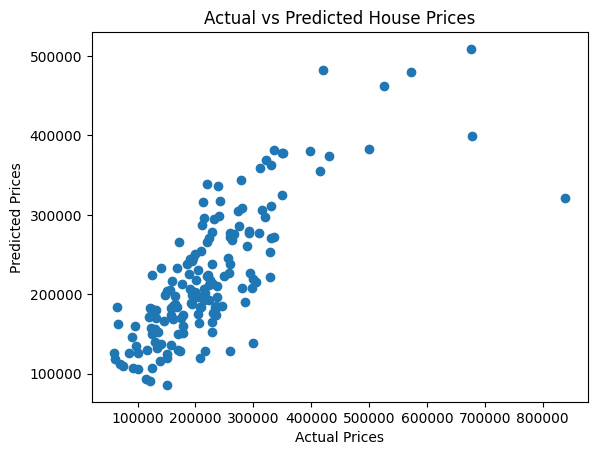

In [35]:
# Plot actual vs predicted
plt.scatter(y_test, y_pred)
# plt.plot(y_test, y_test, color='r')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()